# Atividade • Data Science
<hr>

## Data Discovery

### Sumário

<p> Número de clientes: 105,508

Número de produtos: 5,850

Número de transações: 192,544 </p>


### Dicionário

- **item_id:** ID exclusivo do produto

- **weight:** medição de peso do cliente

- **rented for:** roupas para esse fim que foram alugadas para

- **body type:** tipo de corpo do cliente

- **review_text:** avaliação dada pelo cliente

- **review_summary:** resumo da avaliação

- **size:** o tamanho padronizado do produto

- **rating:** classificação do produto

- **age:** idade do cliente

- **category:** a categoria do produto

- **bust size:** medição do busto do cliente

- **height:** altura do cliente

- **fit:** ajuste de feedback

- **user_id:** um ID exclusivo para o cliente

- **review_date**: data em que a resenha foi escrita

## Objetivos
<p> 1. Produza um gráfico da distribuição de peso (histograma) dos clientes (<strong>em Kg</strong>)</p>
<p> 2. Qual motivo de aluguel (“rented for”) tem o maior número absoluto de “fits”?  Quantos “fits” há para este motivo de aluguel?</p>
<p>3. Qual motivo de aluguel (“rented for”) tem o maior número relativo de “fits”? Qual é o percentual de “fits” para este motivo de aluguel?</p>
<p>4. Produza uma estatística de palavras mais usadas nas avaliações (“review_text”);</p>
<p>5. Que outra estatística ou insight você poderia extrair destes dados?</p>

## Preparando o Ambiente

### Distribuição Linux

In [5]:
! lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


### Versão do Python

In [3]:
! python -V

Python 3.10.12


### Instalando as libs

In [2]:
! pip install -r "../requirements.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 823.2 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=e5faf3fa0028d7b41e987bdd67adf78ff90cf7bf840219650506b7ef089afd01
  Stored in directory: /home/dgamorim/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


### Instalando o JDK

- Execute no terminal o seguinte comando:
  - ```sudo apt-get install openjdk-8-jdk-headless -qq > /dev/null```

In [8]:
! java -version

openjdk version "1.8.0_382"
OpenJDK Runtime Environment (build 1.8.0_382-8u382-ga-1~22.04.1-b05)
OpenJDK 64-Bit Server VM (build 25.382-b05, mixed mode)


### Download do Spark

In [10]:
! wget -q -P "../spark" "https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz"

^C


In [14]:
! tar xf "../spark/spark-3.5.0-bin-hadoop3.tgz" -C "../spark"

In [15]:
! rm -rf "../spark/spark-3.5.0-bin-hadoop3.tgz"

### Importando as bibliotecas

In [67]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as f
import matplotlib.pyplot as plt

### Instanciando o Spark

In [16]:
! export JAVA_HOME=$(readlink -f $(which java))
! export SPARK_HOME="$(readlink -f ../)/spark/spark-3.5.0-bin-hadoop3"

In [17]:
import findspark
findspark.init()

In [29]:
spark = SparkSession.builder\
                    .appName("Atividade Data Science - Multiplan")\
                    .getOrCreate()

In [30]:
spark

## Lendo o arquivo

### Describe

In [41]:
df = spark.read.json('../data/raw/renttherunway_final_data.json')

In [42]:
df.printSchema()

root
 |-- age: string (nullable = true)
 |-- body type: string (nullable = true)
 |-- bust size: string (nullable = true)
 |-- category: string (nullable = true)
 |-- fit: string (nullable = true)
 |-- height: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- rented for: string (nullable = true)
 |-- review_date: string (nullable = true)
 |-- review_summary: string (nullable = true)
 |-- review_text: string (nullable = true)
 |-- size: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- weight: string (nullable = true)



In [43]:
df.show(n=10)

+---+-----------------+---------+--------+---+------+-------+------+-------------+------------------+--------------------+--------------------+----+-------+------+
|age|        body type|bust size|category|fit|height|item_id|rating|   rented for|       review_date|      review_summary|         review_text|size|user_id|weight|
+---+-----------------+---------+--------+---+------+-------+------+-------------+------------------+--------------------+--------------------+----+-------+------+
| 28|        hourglass|      34d|  romper|fit| 5' 8"|2260466|    10|     vacation|    April 20, 2016|So many compliments!|An adorable rompe...|  14| 420272|137lbs|
| 36|straight & narrow|      34b|    gown|fit| 5' 6"| 153475|    10|        other|     June 18, 2013|I felt so glamour...|I rented this dre...|  12| 273551|132lbs|
|116|             NULL|     NULL|  sheath|fit| 5' 4"|1063761|    10|        party| December 14, 2015|It was a great ti...|This hugged in al...|   4| 360448|  NULL|
| 34|           

In [44]:
df.summary().show()

+-------+------------------+-----------------+------------------+--------+------+------+------------------+------------------+----------+-----------------+-------------------+--------------------+------------------+-----------------+------+
|summary|               age|        body type|         bust size|category|   fit|height|           item_id|            rating|rented for|      review_date|     review_summary|         review_text|              size|          user_id|weight|
+-------+------------------+-----------------+------------------+--------+------+------+------------------+------------------+----------+-----------------+-------------------+--------------------+------------------+-----------------+------+
|  count|            191584|           177907|            174133|  192544|192544|191867|            192544|            192462|    192534|           192544|             192544|              192544|            192544|           192544|162562|
|   mean|33.871017412727575|        

In [45]:
df = df\
    .withColumn('rating', df['rating'].cast(DoubleType()))

In [46]:
df.printSchema()

root
 |-- age: string (nullable = true)
 |-- body type: string (nullable = true)
 |-- bust size: string (nullable = true)
 |-- category: string (nullable = true)
 |-- fit: string (nullable = true)
 |-- height: string (nullable = true)
 |-- item_id: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- rented for: string (nullable = true)
 |-- review_date: string (nullable = true)
 |-- review_summary: string (nullable = true)
 |-- review_text: string (nullable = true)
 |-- size: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- weight: string (nullable = true)



### Identificando valores nulos

In [47]:
df.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in df.columns]).show()

+---+---------+---------+--------+---+------+-------+------+----------+-----------+--------------+-----------+----+-------+------+
|age|body type|bust size|category|fit|height|item_id|rating|rented for|review_date|review_summary|review_text|size|user_id|weight|
+---+---------+---------+--------+---+------+-------+------+----------+-----------+--------------+-----------+----+-------+------+
|960|    14637|    18411|       0|  0|   677|      0|    82|        10|          0|             0|          0|   0|      0| 29982|
+---+---------+---------+--------+---+------+-------+------+----------+-----------+--------------+-----------+----+-------+------+




## 1. Produza um gráfico da distribuição de peso (histograma) dos clientes (<strong>em Kg</strong>)

### Criar um dataframe sem valores nulos

In [69]:
df_1 = df.filter(f.col("weight").isNotNull())

In [70]:
df_1.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in df.columns]).show()

+---+---------+---------+--------+---+------+-------+------+----------+-----------+--------------+-----------+----+-------+------+
|age|body type|bust size|category|fit|height|item_id|rating|rented for|review_date|review_summary|review_text|size|user_id|weight|
+---+---------+---------+--------+---+------+-------+------+----------+-----------+--------------+-----------+----+-------+------+
|353|     8675|    10831|       0|  0|   444|      0|    57|        10|          0|             0|          0|   0|      0|     0|
+---+---------+---------+--------+---+------+-------+------+----------+-----------+--------------+-----------+----+-------+------+



### Criando a coluna de conversão para KG

In [71]:
lbs_to_kg = 0.45359237

In [72]:
df_1 = df_1\
    .withColumn("weight_kg", (f.regexp_replace(f.col("weight"), "lbs", "").cast("double") * lbs_to_kg))\
    .withColumn("weight_kg", f.round(f.col("weight_kg"), 2))\
    .select("user_id", "weight_kg")\
    .distinct()

In [73]:
df_1.show(n=10)

+-------+---------+
|user_id|weight_kg|
+-------+---------+
| 533900|    61.23|
| 804645|    86.18|
| 231198|    58.97|
| 689043|    66.22|
| 401869|    54.43|
|  36473|    65.77|
| 135002|    70.31|
| 450585|    65.77|
| 451613|     63.5|
|  23201|    47.63|
+-------+---------+
only showing top 10 rows



In [74]:
df_1 = df_1.pandas_api()

In [75]:
df_1.head()

,user_id,weight_kg
0,533900,61.23
1,804645,86.18
2,231198,58.97
3,689043,66.22
4,401869,54.43


/home/dgamorim/development/multiplan-data-science/.venv/lib/python3.10/site-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


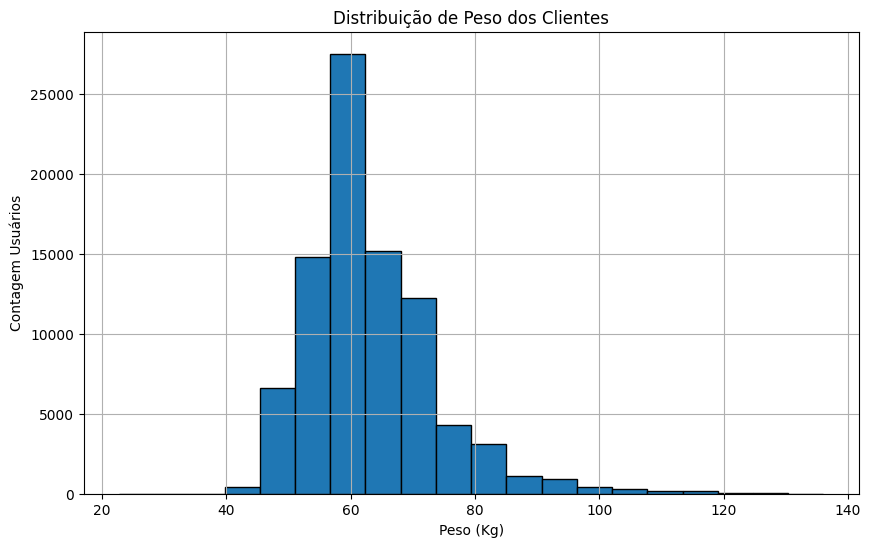

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(df_1["weight_kg"], bins=20, edgecolor="k")
plt.title("Distribuição de Peso dos Clientes")
plt.xlabel("Peso (Kg)")
plt.ylabel("Contagem Usuários")
plt.grid(True)
plt.show()

## 2. Qual motivo de aluguel (“rented for”) tem o maior número absoluto de “fits”?  Quantos “fits” há para este motivo de aluguel?

In [93]:
df_2 = df.select('rented for', 'fit')

In [94]:
df_2 = df_2.filter(df["fit"] == "fit")

In [95]:
df_2 = df_2\
    .groupBy("rented for")\
    .agg({"fit": "count"})

In [98]:
df_2 = df_2.orderBy(f.col("count(fit)").desc())

In [99]:
df_2.show(20)

+---------------+----------+
|     rented for|count(fit)|
+---------------+----------+
|        wedding|     43111|
|  formal affair|     31089|
|          party|     25874|
|       everyday|     11608|
|          other|     11334|
|           work|     10857|
|           date|      5261|
|       vacation|      2914|
|           NULL|         9|
|party: cocktail|         1|
+---------------+----------+



In [100]:
df_2 = df_2.first()

In [104]:
print("Aluguel que tem maior número de 'fit':", df_2["rented for"])
print(f"Quantidade de 'fit' para o aluguel {df_2['rented for']}: {df_2['count(fit)']}")

Aluguel que tem maior número de 'fit': wedding
Quantidade de 'fit' para o aluguel wedding: 43111


## 3.